In [27]:
import numpy as np
import scipy.integrate
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
# Analytical solution has been solved using Sympy for linearised 1-D system. This linearisation is valid when the zeta potential
# at the wall is lower than 4kT/Ze (i.e.) lower than 0.1V. In semiconductor physics, kT/e is also referred to as thermal voltage
# The full solution and the linearised solution have been plotted for z/lambda values of 0-5, the effect of the potential 
# and concentration profiles becomes negligible at larger distances. 

In [22]:
def analyticallinearsoln():
    v = sp.Function("\u03A8")
    z = sp.symbols("z")    
    c0 = sp.symbols("C_0")
    A = sp.symbols("A")
    epsilon = sp.symbols("\u03B5")
    epsilon0 = sp.symbols("\u03B5_0")
    e = sp.symbols("e")
    kb = sp.symbols("k_B")
    T = sp.symbols("T")
    B = sp.symbols("B")
    C2 = sp.symbols("C2")
    dl = sp.symbols("\u03BB")
    
    v0 = sp.symbols("\u03A8_0")

    
    eq = sp.Eq(v(z).diff(z,2) - A*B*v(z),0)
    sol = sp.dsolve(eq,ics={v(0):v0})
    
    sol = sol.subs(C2,0)
    
    sol = sol.subs(sp.sqrt(A*B),1/dl)

    return sol

analyticallinearsoln()


Eq(Ψ(z), Ψ_0*exp(-z/λ))

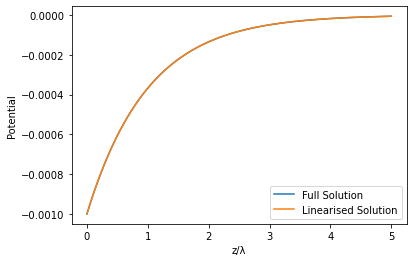

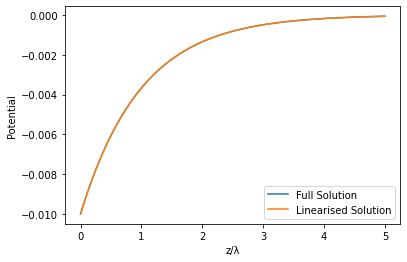

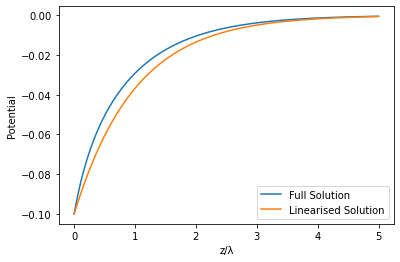

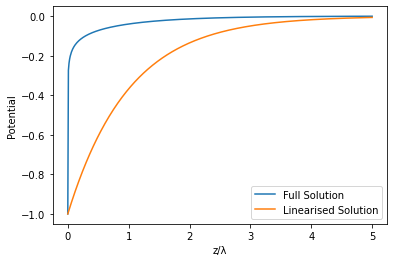

In [23]:
def plotsol(v0):
    z = np.linspace(0,5,500)
    fullsol = lambda x: 0.1035*np.arctanh(np.tanh(v0/0.1035)*np.exp(-x))
    v = fullsol(z)
    
    linsol = lambda x: v0*np.exp(-x)
    v2 = linsol(z)
    plt.plot(z,v)   
    plt.plot(z,v2)
    plt.legend(["Full Solution","Linearised Solution"])
    plt.xlabel("z/\u03BB")
    plt.ylabel("Potential")
    
plotsol(-0.001)
plt.show()
plotsol(-0.01)
plt.show()
plotsol(-0.1)
plt.show()
plotsol(-1)
plt.show()

In [74]:
# The above plots are for different values of wall potential (zeta potential). The first two plots have the linearised solution
# and the full solution be almost exactly the same (these are both orders of magnitude less than Vt). For v0 = -0.1V and v0 = 1V
# the full solution decays much faster than the linearised solution

In [ ]:
# The shooting method implementation in scipy.integrate.solve_bvp() requires you to have function evaluation BCs on both sides
# However, the problem at hand has a derivative BC at the end of the domain (x-> infinite, for numerical purposes, the last
# element of the x grid array). So, the BVP implementation can't be used to solve this in my opinion. I have tried to write a
# script from scratch to solve this by shooting

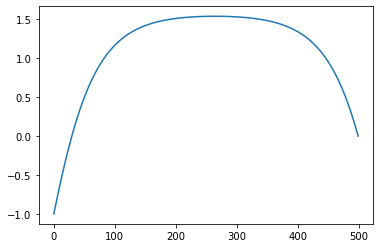

In [83]:
def eq1(x,v):
    #return np.vstack((v[1], -np.sinh(v[0])))
    return np.vstack((v[1], -np.cos(v[0])))

def bc(ua, ub):
    return np.array([ua[0]+1,ub[0]])

def shooting1D(v0):
    x = np.linspace(0,10,500)
    temp = np.ones(500)
    initguess = np.zeros((2,500))
    
    initguess[0] = temp
    
    compute = scipy.integrate.solve_bvp(eq1,bc,x,initguess)
    plt.plot(compute.sol(x)[0])
    
    #print(compute.sol(x)[0])
    
shooting1D(-0.1)



0.0
-0.9585445205284313


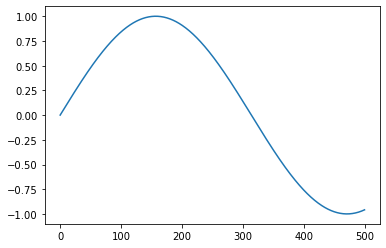

In [100]:
def systemofequations(x,v):
    return np.array([v[1],-v[0]])

def derivative():
    return 
    
    
def shootingimplementation(v0):
    x = np.linspace(0,5,500)
    vprime0 = 0
    tempsol = scipy.integrate.solve_ivp(systemofequations,(0,5),(v0,vprime0),t_eval = x)
    
    vprime = lambda wtf: wtf
    vprime0 = scipy.optimize.newton(vprime,tempsol.y[0][-1])
    print(vprime0)
    plt.plot(tempsol.y[1])
    print(tempsol.y[1][-1])
    
shootingimplementation(-1)